# Aplicando LLM na recomendação de livros

## Conexão e testes iniciais

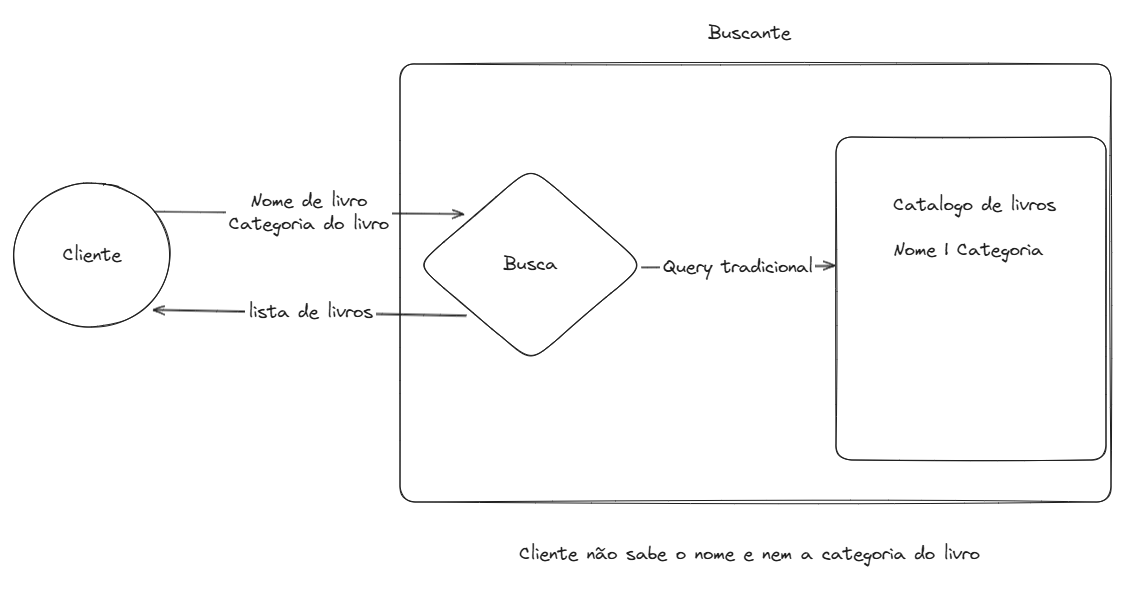

In [9]:
!pip install llama-index --quiet
!pip install llama-index-llms-groq --quiet

In [10]:
from google.colab import userdata
from llama_index.llms.groq import Groq
from llama_index.core.chat_engine import SimpleChatEngine

GROQ_API = userdata.get('GROQ_API_KEY')
llm = Groq(model="llama-3.3-70b-versatile", api_key=GROQ_API)
chat_engine = SimpleChatEngine.from_defaults(llm=llm)

In [11]:
chat_engine.chat_repl()

===== Entering Chat REPL =====
Type "exit" to exit.

Human: exit


In [12]:
llm.complete("Consegue me ajudar com duvidas literarias ?")

CompletionResponse(text='Claro que sim! Estou aqui para ajudar com suas dúvidas literárias. Você pode me perguntar sobre:\n\n* Análise de obras literárias (romances, poemas, peças de teatro, etc.)\n* Autores e suas obras\n* Gêneros literários (ficção, não-ficção, poesia, etc.)\n* Estilos literários (realismo, romantismo, modernismo, etc.)\n* Crítica literária\n* História da literatura\n* Teoria literária\n\nSinta-se à vontade para compartilhar suas dúvidas e eu farei o meu melhor para ajudá-lo. Qual é a sua dúvida literária hoje?', additional_kwargs={'prompt_tokens': 47, 'completion_tokens': 157, 'total_tokens': 204}, raw=ChatCompletion(id='chatcmpl-c69b16fa-eca2-4c9f-905e-8ff9d65a15f6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Claro que sim! Estou aqui para ajudar com suas dúvidas literárias. Você pode me perguntar sobre:\n\n* Análise de obras literárias (romances, poemas, peças de teatro, etc.)\n* Autores e suas obras\n* Gên

In [13]:
llm.complete("Recomende livros de romance")

CompletionResponse(text='Que prazer! Aqui estão algumas recomendações de livros de romance que você pode gostar:\n\n**Clássicos do Romance**\n\n1. **"Orgulho e Preconceito"** de Jane Austen: Um clássico do romance inglês que conta a história de Elizabeth Bennet e Mr. Darcy.\n2. **"Jane Eyre"** de Charlotte Brontë: Uma história de amor e auto-descoberta que segue a vida de Jane Eyre, uma jovem governanta.\n3. **"Wuthering Heights"** de Emily Brontë: Um romance trágico que explora a paixão intensa entre Catherine e Heathcliff.\n\n**Romance Contemporâneo**\n\n1. **"O Amor nos Tempos do Cólera"** de Gabriel García Márquez: Uma história de amor que dura décadas, ambientada na Colômbia.\n2. **"A Garota que Roubou Livros"** de Markus Zusak: Uma história de amor e sobrevivência durante a Segunda Guerra Mundial.\n3. **"Eleanor Oliphant está Bem"** de Gail Honeyman: Uma história de amor e auto-aceitação que segue a vida de Eleanor, uma mulher solitária.\n\n**Romance Paranormal**\n\n1. **"Crepúsc

In [14]:
resposta = llm.complete("Recomende livros de romance")

In [15]:
print(resposta.text)

Que prazer! Aqui estão algumas recomendações de livros de romance que você pode gostar:

**Clássicos do Romance**

1. **"Orgulho e Preconceito"** de Jane Austen: Um clássico do romance inglês que conta a história de Elizabeth Bennet e Mr. Darcy.
2. **"Jane Eyre"** de Charlotte Brontë: Uma história de amor e auto-descoberta que segue a vida de Jane Eyre, uma jovem governanta.
3. **"Wuthering Heights"** de Emily Brontë: Um romance trágico e apaixonado que conta a história de Catherine e Heathcliff.

**Romance Contemporâneo**

1. **"O Amor nos Tempos do Cólera"** de Gabriel García Márquez: Uma história de amor que dura décadas, ambientada na Colômbia.
2. **"A Garota que Roubou Livros"** de Markus Zusak: Uma história de amor e sobrevivência durante a Segunda Guerra Mundial.
3. **"Eleanor Oliphant está Bem"** de Gail Honeyman: Uma história de amor e auto-aceitação que segue a vida de Eleanor, uma mulher solitária.

**Romance Paranormal**

1. **"Crepúsculo"** de Stephenie Meyer: Uma história

## Construindo recomendações que existem na base de dados

Restrigindo a recomendação da LLM fornecendo a base de dados da empresa. Aplicando tecnica de summarize para limitar conteudo apresentado a LLM.

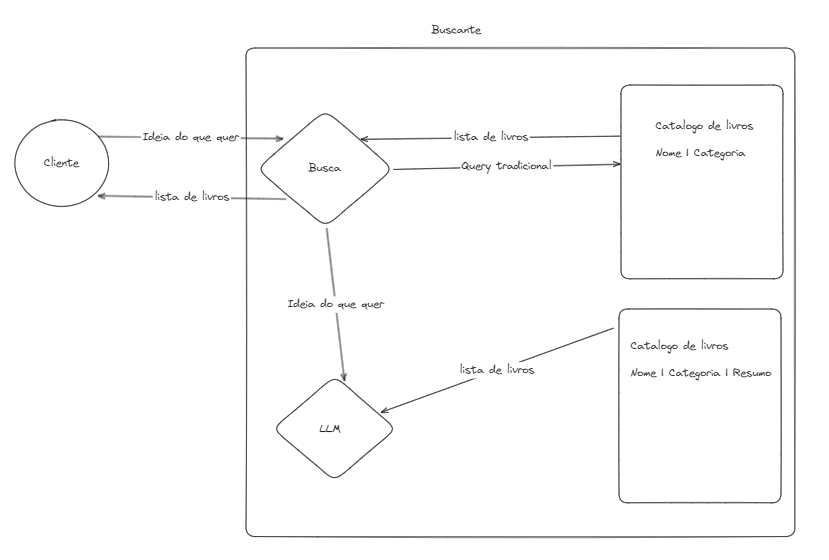

In [16]:
import pandas as pd
import json

df = pd.read_csv("/content/csv/livros_mais_vendidos.csv")
df.head()

,nome,categoria,sinopse,preco
0,É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR),Romances,Todo final tem um começo. Agora em uma edição ...,"R$ 94,90"
1,TUDO É RIO,Romances,NaN,"R$ 71,39"
2,VERITY (EDIÇÃO DE COLECIONADOR),Suspenses,Um casal apaixonado. Uma intrusa. Três mentes ...,"R$ 79,90"
3,TÁTICAS DO AMOR,Romances,"Febre no TikTok, comédia romântica narra a ami...","R$ 65,89"
4,NEM TE CONTO,Romances,Da autora best seller do \n ...,"R$ 59,90"


In [17]:
print("Numero de registros: ",len(df))

Numero de registros:  175


In [18]:
prompt = "Só recomende livros dessa base de dados:"

for linha in df.values:
  prompt += f"\n{linha[0]}"

entrada_user = "Me recomende livros de romance ?"
len(prompt)

4470

In [19]:
resposta = llm.complete(prompt=prompt+entrada_user).text
print(resposta)

Claro, aqui estão algumas recomendações de livros de romance baseadas na lista que você forneceu:

1. **É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)**: Um romance que explora o início de uma relação e como ela pode evoluir.
2. **VERITY (EDIÇÃO DE COLECIONADOR)**: Um romance psicológico que mistura suspense e romance.
3. **TÁTICAS DO AMOR**: Um livro que explora as táticas e estratégias para conquistar o amor.
4. **NEM TE CONTO**: Um romance que explora a relação entre dois personagens e como eles lidam com os desafios do amor.
5. **O BEIJO DA NEVE**: Um romance que explora a relação entre dois personagens em um cenário de inverno.
6. **UMA SEGUNDA CHANCE (FENÔMENO DO TIKTOK)**: Um romance que explora a segunda chance de amor entre dois personagens.
7. **TUDO SOBRE O AMOR - NOVAS PERSPECTIVAS**: Um livro que explora diferentes perspectivas sobre o amor e as relações.
8. **EU E ESSE MEU CORAÇÃO**: Um romance que explora a relação entre o protagonista e seu próprio coração.
9. **JANTAR SEC

In [20]:
prompt = """
Somente responda em json
Formato resposta em json
[data:{
  "livros": [
    {
      "titulo": "Titulo do livro
      "categoria": "Categoria do livro"
      "Justificativa" "Porque recomenda"
    }
  ]
}]
Só recomende livros dessa base de dados:

"""

for linha in df.values:
  prompt += f"\n{linha[0]}"

resposta = llm.complete(prompt=prompt+entrada_user).text
print(resposta)

```
{
  "data": {
    "livros": [
      {
        "titulo": "É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)",
        "categoria": "Romance",
        "Justificativa": "Um clássico do gênero, com uma história envolvente e personagens bem desenvolvidas."
      },
      {
        "titulo": "TUDO É RIO",
        "categoria": "Romance",
        "Justificativa": "Um romance que explora a complexidade das relações humanas e a busca por amor e conexão."
      },
      {
        "titulo": "VERITY (EDIÇÃO DE COLECIONADOR)",
        "categoria": "Romance",
        "Justificativa": "Um romance psicológico que explora a mente de uma mulher e sua busca por amor e verdade."
      },
      {
        "titulo": "TÁTICAS DO AMOR",
        "categoria": "Romance",
        "Justificativa": "Um romance leve e divertido que explora as táticas do amor e as relações humanas."
      },
      {
        "titulo": "NEM TE CONTO",
        "categoria": "Romance",
        "Justificativa": "Um romance que explora a comple

In [21]:
resposta_limpa = resposta.strip()

resposta_limpa = resposta_limpa.strip('`')

try:
    resposta_json = json.loads(resposta_limpa)
    print("Decodificação JSON bem-sucedida!")
except json.JSONDecodeError as e:
    print(f"Erro ao decodificar (JSONDecodeError): {e}")
    print(f"Tipo da variável 'resposta': {type(resposta)}")
    print(f"Primeiros 100 caracteres de 'resposta_limpa': {resposta_limpa[:100]}")

Decodificação JSON bem-sucedida!


In [22]:
for livro in resposta_json["data"]["livros"]:
  titulo = livro.get("titulo").upper()

  if df.query("nome == @titulo").empty:
    print(f"Livro {titulo} não encontrado")

livro_novo = {'titulo': 'Não existe',
      'categoria': 'Romance',
      'Justificativa': 'Um romance que vai levar você a uma jornada emocionante pela cidade do Rio de Janeiro.'}

resposta_json["data"]["livros"].extend([livro_novo])

In [23]:
for livro in resposta_json["data"]["livros"]:
  titulo = livro.get("titulo").upper()

  if df.query("nome == @titulo").empty:
    print(f"Livro {titulo} não encontrado")

Livro NÃO EXISTE não encontrado


# Criando uma base vetorial

Utilizando a tecnica de embeding e base de dados estruturadas para refinar busca de dados a serem passadoa a LLM

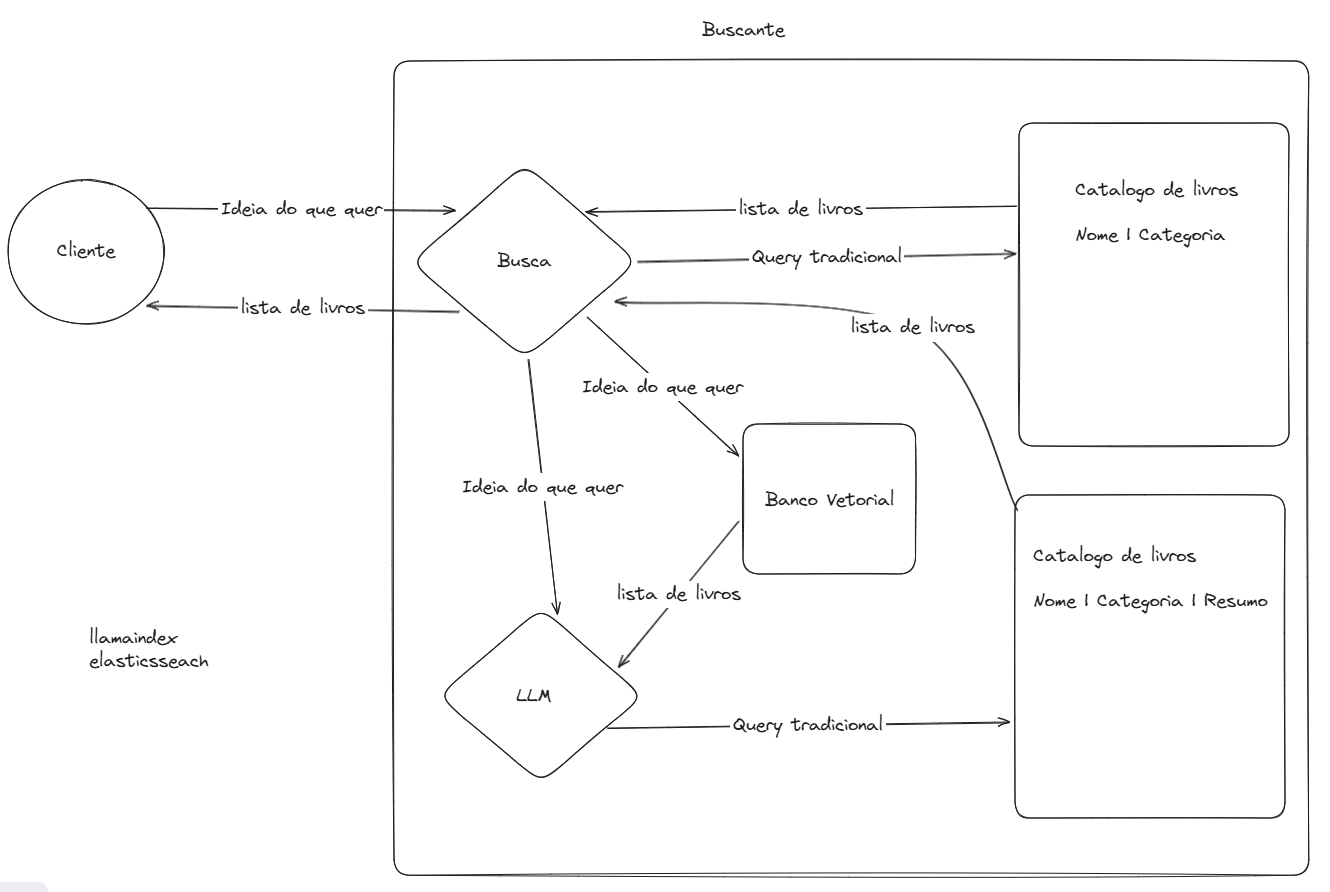

In [24]:
!pip install -q llama-index-embeddings-huggingface
!pip install -q llama-index-vector-stores-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.1 MB/s eta 

In [25]:
from llama_index.core import Settings
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
from llama_index.core import SimpleDirectoryReader
from llama_index.core import VectorStoreIndex
from llama_index.core import load_index_from_storage
import chromadb
import time

documents = SimpleDirectoryReader('csv').load_data()

embed_model = HuggingFaceEmbedding(model_name="intfloat/multilingual-e5-large")

Settings.embed_model = embed_model

db = chromadb.PersistentClient(path="./chroma_db")
chroma_client = db
collection_name = "meus_documentos"

try:
    chroma_collection = chroma_client.get_or_create_collection(
        name=collection_name
    )

    vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
    storage_context = StorageContext.from_defaults(vector_store=vector_store)

    print("✅ Configuração concluída. VectorStore e StorageContext prontos.")

except Exception as e:
    print(f"Erro ao configurar: {e}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

✅ Configuração concluída. VectorStore e StorageContext prontos.


In [26]:
start_time = time.time()

index = VectorStoreIndex.from_documents(documents, storage_context=storage_context, embed_model=embed_model)

end_time = time.time()
execution_time = end_time - start_time

print(f"Tempo de execução: {execution_time} segundos")

Tempo de execução: 500.0228350162506 segundos


In [27]:
index = load_index_from_storage(storage_context, embed_model=embed_model)

query_engine = index.as_query_engine(similarity_top_k=2, llm=llm)

In [28]:
query_engine.query("Livros de romance?").response

'O beijo da neve, Quarta Asa, Imperfeitos, Tudo sobre o amor - Novas Perspectivas.'

In [29]:
query_str = "Livros de romance"

query_embeded = embed_model.get_text_embedding(query_str)

chroma_collection.query(query_embeded, n_results=10, include=['distances', 'embeddings'])

{'ids': [['a73f0cee-c8b0-4106-aa1a-6df12cc76969',
   '9ff85f56-29e3-422d-a74f-62f451086fd4',
   '6bf8250a-34ce-4057-aed6-f959d8d23378',
   'd81ecf46-a66c-4c63-b514-f47d97c64aee',
   '53db762f-6fdf-4d4b-bb46-0b090f2b0541',
   'ab08d9b5-735a-4a95-8fc3-86a3601f9447',
   'e6752f9f-0e64-43fe-a01c-ba9202404b5f',
   'f227476a-5505-4ac6-9158-febd730adc7d',
   '0967a8f7-920d-4cdc-b466-ef32691fd7d4',
   'e38f2850-8122-4e76-89bd-5c34c1d453e5']],
 'embeddings': [array([[ 0.02034744,  0.00922662, -0.02066277, ...,  0.00392679,
          -0.00175007,  0.03043895],
         [-0.00019601, -0.01406414, -0.00478697, ..., -0.00782367,
          -0.03109999,  0.03047546],
         [ 0.00742916, -0.00693726, -0.00488357, ..., -0.00854558,
          -0.02482302,  0.0039657 ],
         ...,
         [ 0.00401086, -0.00727835, -0.01494478, ..., -0.01144059,
          -0.03114293,  0.02482321],
         [ 0.02667538, -0.02014447, -0.00768217, ...,  0.01630419,
          -0.03391538,  0.02649633],
         [ 0.

In [30]:
# Obter IDs de todos os documentos
doc_ids = chroma_collection.get()['ids']
print(f"Total de IDs: {len(doc_ids)}")
print("Amostra de IDs:", doc_ids[:5])

# Extrair uma amostra dos documentos
amostra = chroma_collection.get([doc_ids[i] for i in range(5)])  # Ajuste o número se quiser mais amostras
print("Amostra de documentos:", amostra)

Total de IDs: 72
Amostra de IDs: ['e38f2850-8122-4e76-89bd-5c34c1d453e5', 'b6c6fa59-95d2-4672-af8c-c4fe379dbedb', '0967a8f7-920d-4cdc-b466-ef32691fd7d4', 'a73f0cee-c8b0-4106-aa1a-6df12cc76969', '0cf9b684-147b-4950-9a12-c2777ce337ae']
Amostra de documentos: {'ids': ['e38f2850-8122-4e76-89bd-5c34c1d453e5', 'b6c6fa59-95d2-4672-af8c-c4fe379dbedb', '0967a8f7-920d-4cdc-b466-ef32691fd7d4', 'a73f0cee-c8b0-4106-aa1a-6df12cc76969', '0cf9b684-147b-4950-9a12-c2777ce337ae'], 'embeddings': None, 'documents': ['É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR), Romances, Todo final tem um começo. Agora em uma edição especial de colecionador, com pintura trilateral e exclusiva para o Brasil, conheça a sequência de \n                        É assim que acaba\n                        . Da autora best-seller mundial e fenômeno editorial Colleen Hoover, que já vendeu mais de dois milhões de livros no país.\n                    \n                \n                \n                \xa0\n                \n       

In [31]:
chroma_collection.get("f6179883-2d04-4838-9028-a41fcf8acd75")

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

# Nova fonte de dados

In [42]:
from llama_index.core import get_response_synthesizer
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import CustomQueryEngine
from llama_index.core.retrievers import BaseRetriever
from llama_index.core.response_synthesizers import BaseSynthesizer

retriever = index.as_retriever()
synthesizer = get_response_synthesizer(response_mode="compact", llm=llm)

In [33]:
novos_documentos = SimpleDirectoryReader("artigos").load_data()

In [34]:
end_time = time.time()

for doc in novos_documentos:
    index.insert(doc)

execution_time = end_time - start_time

print(f"Tempo de execução: {execution_time} segundos")

Tempo de execução: 722.826996088028 segundos


In [35]:
doc_ids = chroma_collection.get()['ids']
print(f"Total de IDs: {len(doc_ids)}")

Total de IDs: 113


In [38]:
query_str = "Livros de romance"
query_embeded = embed_model.get_text_embedding(query_str)
chroma_collection.query(query_embeded, n_results=10, include=['distances'])

{'ids': [['a73f0cee-c8b0-4106-aa1a-6df12cc76969',
   '9ff85f56-29e3-422d-a74f-62f451086fd4',
   '02ca81eb-8547-4865-bd01-89c916b3b9c8',
   '6bf8250a-34ce-4057-aed6-f959d8d23378',
   'd81ecf46-a66c-4c63-b514-f47d97c64aee',
   '53db762f-6fdf-4d4b-bb46-0b090f2b0541',
   'b05dab45-7b8b-41ff-ab29-e7527d2ab30f',
   '4e0ddff7-8471-4e09-8ea1-0dfdd93f7454',
   'ab08d9b5-735a-4a95-8fc3-86a3601f9447',
   'e6752f9f-0e64-43fe-a01c-ba9202404b5f']],
 'embeddings': None,
 'documents': None,
 'uris': None,
 'included': ['distances'],
 'data': None,
 'metadatas': None,
 'distances': [[0.3427867293357849,
   0.35500288009643555,
   0.36030256748199463,
   0.3606693148612976,
   0.36115846037864685,
   0.3618915379047394,
   0.3698556423187256,
   0.3747524619102478,
   0.3766447901725769,
   0.37740784883499146]]}

In [41]:
qa_prompt = PromptTemplate(
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Responda em português.\n"
    """Somente responda em json
      Formato resposta em json
      {"data":{
        "livros": [
          {
            "titulo": "Titulo do livro
            "categoria": "Categoria do livro"
            "Justificativa" "Porque recomenda"
          }
        ]
      }}

      Só recomende livros dessa base de dados"""
    "Query: {query_str}\n"
    "Answer: "
)

In [43]:
class RAGStringQueryEngine(CustomQueryEngine):

    retriever: BaseRetriever
    response_synthesizer: BaseSynthesizer
    llm: Groq
    qa_prompt: PromptTemplate

    def custom_query(self, query_str: str):
        nodes = self.retriever.retrieve(query_str)

        context_str = "\n\n".join([n.node.get_content() for n in nodes])

        response = self.llm.complete(
            self.qa_prompt.format(context_str=context_str, query_str=query_str)
        )

        return str(response)

In [44]:
query_engine_customize = RAGStringQueryEngine(
    retriever=retriever,
    response_synthesizer=synthesizer,
    llm=llm,
    qa_prompt=qa_prompt
)

In [45]:
resposta = query_engine_customize.query("Quais livros de Romance").response
print(resposta)

{"data":{
  "livros": [
    {
      "titulo": "É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)",
      "categoria": "Romance",
      "Justificativa": "Para aqueles que buscam uma história de amor mais tradicional"
    },
    {
      "titulo": "TUDO É RIO",
      "categoria": "Romance",
      "Justificativa": "Para quem busca uma história mais leve e divertida"
    },
    {
      "titulo": "TÁTICAS DO AMOR",
      "categoria": "Romance",
      "Justificativa": "Para quem busca uma história mais leve e divertida"
    },
    {
      "titulo": "NEM TE CONTO",
      "categoria": "Romance",
      "Justificativa": "Para aqueles que preferem histórias mais intensas e emocionais"
    },
    {
      "titulo": "O BEIJO DA NEVE",
      "categoria": "Romance",
      "Justificativa": "Para aqueles que preferem histórias mais intensas e emocionais"
    },
    {
      "titulo": "EU E ESSE MEU CORAÇÃO",
      "categoria": "Romance",
      "Justificativa": "Para aqueles que preferem histórias mais intensas 

In [46]:
resposta_json = json.loads(resposta)

In [47]:
for livro in resposta_json["data"]["livros"]:
  titulo = livro.get("titulo").upper()

  if df.query("nome == @titulo").empty:
    print(f"Livro {titulo} não encontrado")

# Publicando MVP

In [55]:
def validando(resposta_json):
  for livro in resposta_json["data"]["livros"]:
    titulo = livro.get("titulo").upper()

  if df.query("nome.str.contains(@titulo)").empty:
    raise Exception(f"Livro {titulo} não encontrado")

In [56]:
def formatando_respostas(response, consulta):
  prompt = f'''
  Formate a resposta para o usuario
  Sua persona é um atendente da empresa buscante que vai recomendar livros usando a consulta do usuario como referencia
  E recomendar somente esses livros que estão em response
  consulta: {consulta}
  response: {response}
  '''
  resposta_final = llm.complete(prompt=prompt).text
  return resposta_final

In [57]:
def pipeline_completo(consulta):
    response = query_engine_customize.query(consulta).response
    resposta_json = json.loads(response)

    validando(resposta_json)

    response = formatando_respostas(response, consulta)

    return str(response)

In [58]:
def pipeline_completo(consulta):
    response = query_engine_customize.query(consulta).response
    print(f"Resposta bruta da LLM: {response}")
    resposta_json = json.loads(response)

    validando(resposta_json)

    response = formatando_respostas(response, consulta)

    return str(response)

print(pipeline_completo("Quais livros de Romance"))

Resposta bruta da LLM: {"data":{
  "livros": [
    {
      "titulo": "É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história de amor mais tradicional"
    },
    {
      "titulo": "TUDO É RIO",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história mais leve e divertida"
    },
    {
      "titulo": "TÁTICAS DO AMOR",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história mais leve e divertida"
    },
    {
      "titulo": "NEM TE CONTO",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história mais intensa e emocionante"
    },
    {
      "titulo": "O BEIJO DA NEVE",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história mais intensa e emocionante"
    },
    {
      "titulo": "EU E ESSE MEU CORAÇÃO",
      "categoria": "Romance",
      "justificativa": "Recomendo por ser uma história mais int

In [59]:
!pip install -q gradio

In [64]:
import gradio as gr

input_textbox = gr.Textbox(
    label="📝 Faça sua pergunta sobre os nossos livros!",
    lines=5
)

output_textbox = gr.Textbox(
    label="✨ Resultado",
    show_copy_button=True,
    lines=5
)

demo = gr.Interface(
    fn=pipeline_completo,
    inputs=input_textbox,
    outputs=output_textbox,
    title="🤖 Integração de LLMs com bancos de dados vetoriais",
    description="Insira qualquer pergunta no campo abaixo. Nossa pipeline completa irá analisar e retornar o resultado.",
    examples=[
        ["Quais livros de Romance."],
        ["Consegue me ajudar com duvidas literarias?"],
    ],
    theme=gr.themes.Soft(),
)

demo.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4f30c04c108d866597.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Resposta bruta da LLM: {"data":{
  "livros": [
    {
      "titulo": "É ASSIM QUE COMEÇA (EDIÇÃO DE COLECIONADOR)",
      "categoria": "Romances",
      "Justificativa": "Recomendo porque é uma edição especial de colecionador de uma autora best-seller mundial, com uma história emocionante e uma perspectiva interessante sobre o passado de Atlas e a vida de Lily após o divórcio."
    },
    {
      "titulo": "VERITY (EDIÇÃO DE COLECIONADOR)",
      "categoria": "Suspenses",
      "Justificativa": "Recomendo porque é um thriller psicológico que explora o lado mais sombrio das relações humanas, com uma narrativa perturbadora e chocante, e uma surpresa no final."
    },
    {
      "titulo": "TÁTICAS DO AMOR",
      "categoria": "Romances",
      "Justificativa": "Recomendo porque é uma comédia romântica divertida que narra a amizade e o amor entre uma bailarina sonhadora e um jogador de futebol americano, com uma história envolvente e personagens interessantes."
    }
  ]
}}
Resposta bruta